In [1]:
# Imporing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import mean_squared_error

In [2]:
# Loading dataset

df = pd.read_csv("Life_Expectancy.csv")
df.columns = [col.strip() for col in df.columns]
df.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


<a id="Bivariate"> </a>
## 1. Bivariate Regression

**1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?**
                

In [3]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis',
       'Measles', 'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV',
       'GDP', 'Population', 'Malnourished10_19', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [4]:
df[["Adult_Mortality","Expected"]]

,Adult_Mortality,Expected
0,263,65.0
1,8,77.5
2,19,75.6
3,335,52.4
4,116,76.3
...,...,...
119,37,55.3
120,397,53.4
121,48,52.0
122,415,57.0


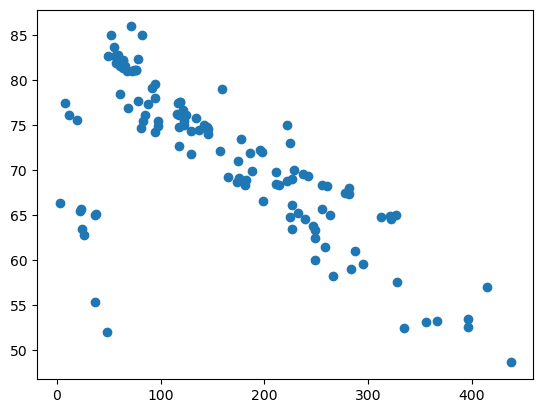

In [5]:
plt.scatter(df["Adult_Mortality"],df["Expected"])
plt.show()

In [6]:
y = df['Expected']
x = df["Adult_Mortality"]
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     124.6
Date:                Mon, 12 May 2025   Prob (F-statistic):           2.27e-20
Time:                        08:50:28   Log-Likelihood:                -396.71
No. Observations:                 124   AIC:                             797.4
Df Residuals:                     122   BIC:                             803.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.7106      1.005     80.272      0.000      78.720      82.701
Adult_Mortality    -0.0591      0.005    -11.164      0.000      -0.070      -0.049
==============================================================================
Omnibus:                       57.611   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.621
Skew:                          -1.821   Prob(JB):                     1.32e-35
Kurtosis:                       7.222   Cond. No.                         355.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# As p-value for mortaility rate is less than 0.05, the variable has significant impact on the life expectancy.

# R^2 0.505 indicates that 50.5% of variation in life expectancy is explained by Adult_Mortality
# Negative coefficient of -0.0591 of Adult_Mortality suggest that as Adult Mortality rate increases life expectancy decreases.
# Thus, As Adult Mortality rate decreases life expectancy increases.

**2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?**

In [8]:
y1 = df['Expected']
x1 = df['Income_Index']

xc1 = sm.add_constant(x1)
model_1 = sm.OLS(y1, xc1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Mon, 12 May 2025   Prob (F-statistic):           1.13e-34
Time:                        08:50:28   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
print("Residual:",np.mean(model_1.resid))

Residual: -6.303201688194437e-15


<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

**3. Analyze the impact of immunization on life expectancy.**

In [10]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis',
       'Measles', 'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV',
       'GDP', 'Population', 'Malnourished10_19', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [11]:
y2 = df['Expected']
x2 = df[['Hepatitis','Polio','Diphtheria']]

xc2 = sm.add_constant(x2)
model2 = sm.OLS(y2,xc2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Mon, 12 May 2025   Prob (F-statistic):           0.000468
Time:                        08:50:28   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.9881      3.524     16.453      0.000      51.010      64.966
Hepatitis     -0.1037      0.068     -1.528      0.129      -0.238       0.031
Polio          0.0910      0.043      2.099      0.038       0.005       0.177
Diphtheria     0.1613      0.082      1.969      0.051      -0.001       0.323
==============================================================================
Omnibus:                        4.513   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.279
Skew:                          -0.396   Prob(JB):                        0.118
Kurtosis:                       2.550   Cond. No.                         755.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Hepatitis and Diphtheria are insignificant variables whereas Polio is has a significantly postive impact on life expectancy.

**4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?**

In [13]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis',
       'Measles', 'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV',
       'GDP', 'Population', 'Malnourished10_19', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [14]:
y3 = df['Expected']
x3 = df[['Status','Polio']]
x3 = pd.get_dummies(x3, columns = ['Status'],dtype ='int64',drop_first = True)
# Here, 1 indicates developing and 0 indicates developed

In [15]:
xc3 = sm.add_constant(x3)
model3 = sm.OLS(y3,xc3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     27.90
Date:                Mon, 12 May 2025   Prob (F-statistic):           1.09e-10
Time:                        08:50:29   Log-Likelihood:                -416.83
No. Observations:                 124   AIC:                             839.7
Df Residuals:                     121   BIC:                             848.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                71.6009      3.256     21.988      0.000      65.154      78.048
Polio                 0.1008      0.030      3.382      0.001       0.042       0.160
Status_Developing   -10.7587      1.784     -6.030      0.000     -14.291      -7.227
==============================================================================
Omnibus:                        3.123   Durbin-Watson:                   1.235
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                2.859
Skew:                          -0.372   Prob(JB):                        0.239
Kurtosis:                       3.024   Cond. No.                         487.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Therefore, on average life expectancy is less by 10 years in a developing country compared to a developed country.

<a id="ins"> </a>
## 3. Inferences about slope

**5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.**

In [17]:
df1 = df.drop('Country',axis = 1)
df1 = pd.get_dummies(df1, columns=['Status'], dtype='int64', drop_first=True)

y4 = df1['Expected']
x4 = df1.drop('Expected',axis = 1)

In [18]:
xc4 = sm.add_constant(x4)
xc4 = xc4.drop('Underfive_Deaths',axis=1)

model4 = sm.OLS(y4,xc4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     39.40
Date:                Mon, 12 May 2025   Prob (F-statistic):           8.25e-37
Time:                        08:50:29   Log-Likelihood:                -324.56
No. Observations:                 124   AIC:                             681.1
Df Residuals:                     108   BIC:                             726.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                58.6985      3.642     16.116      0.000      51.479      65.918
Adult_Mortality      -0.0237      0.004     -5.863      0.000      -0.032      -0.016
Infant_Deaths         0.0037      0.008      0.474      0.637      -0.012       0.019
Hepatitis             0.0651      0.032      2.033      0.045       0.002       0.129
Measles           -5.081e-05   6.09e-05     -0.834      0.406      -0.000    6.99e-05
BMI                  -0.0256      0.023     -1.132      0.260      -0.071       0.019
Polio                -0.0040      0.022     -0.183      0.855      -0.047       0.039
Diphtheria           -0.0342      0.040     -0.856      0.394      -0.113       0.045
HIV                  -1.0941      0.266     -4.111      0.000      -1.622      -0.567
GDP                4.661e-05   3.48e-05      1.338      0.184   -2.24e-05       0.000
Population        -1.659e-08   8.54e-09     -1.943      0.055   -3.35e-08    3.36e-10
Malnourished10_19    -0.4266      0.299     -1.427      0.156      -1.019       0.166
Malnourished5_9       0.3177      0.284      1.118      0.266      -0.246       0.881
Income_Index         19.1000      6.336      3.014      0.003       6.541      31.659
Schooling             0.3857      0.347      1.111      0.269      -0.303       1.074
Status_Developing    -1.9969      1.174     -1.701      0.092      -4.323       0.329
==============================================================================
Omnibus:                        6.620   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.037   Jarque-Bera (JB):               10.367
Skew:                           0.157   Prob(JB):                      0.00561
Kurtosis:                       4.381   Cond. No.                     9.13e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
vf = [vif(xc4.values,i) for i in range(xc4.shape[1])]
pd.DataFrame(vf, index=xc4.columns, columns=['vif'])

,vif
const,130.366973
Adult_Mortality,1.654951
Infant_Deaths,5.376175
Hepatitis,4.343615
Measles,4.798759
BMI,2.245092
Polio,2.155286
Diphtheria,5.696345
HIV,2.148349
GDP,1.401741


In [20]:
cols = list(xc4.columns)

while (len(cols)>0):
    x5 = xc4[cols]
    model = sm.OLS(y4,x5).fit()
    p = model.pvalues
    p = p.drop('const')
    pmax = max(p)
    feature_pmax = p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_pmax)
        print("Remove",feature_pmax,'prob',pmax)
    else:
        break

print()
print(cols)

Remove Polio prob 0.8554983773087682
Remove Infant_Deaths prob 0.6441526806495996
Remove Measles prob 0.396554083780879
Remove Malnourished5_9 prob 0.40775900406476606
Remove Schooling prob 0.34224867248063207
Remove BMI prob 0.2791707552443956
Remove Diphtheria prob 0.29656711273258296
Remove Malnourished10_19 prob 0.21989585936318343
Remove GDP prob 0.16687761685825808

['const', 'Adult_Mortality', 'Hepatitis', 'HIV', 'Population', 'Income_Index', 'Status_Developing']


**6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.**

In [21]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis',
       'Measles', 'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV',
       'GDP', 'Population', 'Malnourished10_19', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [22]:
y5 = df['Expected']
x5 = df[['GDP','Income_Index']]

xc5 = sm.add_constant(x5)
model = sm.OLS(y5,xc5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     150.6
Date:                Mon, 12 May 2025   Prob (F-statistic):           1.44e-33
Time:                        08:50:29   Log-Likelihood:                -362.85
No. Observations:                 124   AIC:                             731.7
Df Residuals:                     121   BIC:                             740.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.6132      1.865     22.848      0.000      38.921      46.306
GDP           4.515e-05   4.36e-05      1.034      0.303   -4.13e-05       0.000
Income_Index    40.9705      2.823     14.512      0.000      35.381      46.560
==============================================================================
Omnibus:                        9.157   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               16.954
Skew:                           0.232   Prob(JB):                     0.000208
Kurtosis:                       4.751   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
y5 = df['Expected']
x5 = df['Income_Index']
xc5 = sm.add_constant(x5)

model = sm.OLS(y5,xc5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Mon, 12 May 2025   Prob (F-statistic):           1.13e-34
Time:                        08:50:29   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
y_pred5 = model.predict(xc5)

In [25]:
RSS = ((y_pred5-y5.mean())**2).sum()
ESS = ((y_pred5-y5)**2).sum()
TSS = ((y-y.mean())**2).sum()
print("TSS",TSS,"RSS",RSS,"ESS",ESS)

TSS 8819.805483870969 RSS 6270.2206804168645 ESS 2549.5848034540973


In [26]:
print("ESS:",ESS)

ESS: 2549.5848034540973


**7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)**

Lower bound of HDI coefficient = 37.576 and upper bound of HDI coefficient = 47.273, with lower bound of HDI coefficient the life expectancy is 41.9191+37.576 whereas upper bound of HDI coefficient the life expectancy is 41.9191+47.273 for a unit change in Income_Index.

<a id="ML_eval"> </a>
## 4. Model Evaluation

**8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?**

In [27]:
y = df['Expected']
x = df[['Adult_Mortality']]

xc = sm.add_constant(x)

model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     124.6
Date:                Mon, 12 May 2025   Prob (F-statistic):           2.27e-20
Time:                        08:50:30   Log-Likelihood:                -396.71
No. Observations:                 124   AIC:                             797.4
Df Residuals:                     122   BIC:                             803.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.7106      1.005     80.272      0.000      78.720      82.701
Adult_Mortality    -0.0591      0.005    -11.164      0.000      -0.070      -0.049
==============================================================================
Omnibus:                       57.611   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.621
Skew:                          -1.821   Prob(JB):                     1.32e-35
Kurtosis:                       7.222   Cond. No.                         355.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
y_pred = model.predict(xc)

rmse = np.sqrt(mean_squared_error(y,y_pred))
print("Root mean squared error",rmse)

Root mean squared error 5.931644084793883


In [29]:
y = df['Expected']
x = df[['Adult_Mortality','Population']]
xc = sm.add_constant(x)

model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     62.12
Date:                Mon, 12 May 2025   Prob (F-statistic):           2.74e-19
Time:                        08:50:30   Log-Likelihood:                -396.54
No. Observations:                 124   AIC:                             799.1
Df Residuals:                     121   BIC:                             807.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.6129      1.023     78.783      0.000      78.587      82.639
Adult_Mortality    -0.0594      0.005    -11.133      0.000      -0.070      -0.049
Population       7.436e-09   1.33e-08      0.561      0.576   -1.88e-08    3.37e-08
==============================================================================
Omnibus:                       57.763   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.344
Skew:                          -1.826   Prob(JB):                     9.22e-36
Kurtosis:                       7.231   Cond. No.                     8.61e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.61e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
y_pred = model.predict(xc)

print("RMSE after adding Population", np.sqrt(mean_squared_error(y,y_pred)))

RMSE after adding Population 5.923942334164854


Very minimal impact as RMSE reduced from 5.93 to 5.92.

AIC and BIC values have increased indicating that adding population doesn't have a significant impact in improving the model i.e. the model is worsening.

**9. Fit a full model and test the significance of the overall model.**

In [31]:
df1 = df.drop('Country',axis=1)
df1 = pd.get_dummies(df1,columns=['Status'],dtype='int64',drop_first=True)

In [32]:
y = df1['Expected']
x = df1.drop('Expected',axis=1)
xc = sm.add_constant(x)

In [33]:
# significant variables
xc_signi = xc[cols]

In [34]:
model = sm.OLS(y,xc_signi).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     97.84
Date:                Mon, 12 May 2025   Prob (F-statistic):           3.20e-43
Time:                        08:50:30   Log-Likelihood:                -329.08
No. Observations:                 124   AIC:                             672.2
Df Residuals:                     117   BIC:                             691.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                58.9027      3.005     19.603      0.000      52.952      64.853
Adult_Mortality      -0.0235      0.004     -5.950      0.000      -0.031      -0.016
Hepatitis             0.0353      0.016      2.237      0.027       0.004       0.067
HIV                  -1.0942      0.252     -4.342      0.000      -1.593      -0.595
Population        -1.698e-08    8.1e-09     -2.096      0.038    -3.3e-08   -9.36e-10
Income_Index         24.0067      3.117      7.701      0.000      17.833      30.181
Status_Developing    -2.6723      1.077     -2.481      0.015      -4.806      -0.539
==============================================================================
Omnibus:                       10.733   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               21.171
Skew:                           0.288   Prob(JB):                     2.53e-05
Kurtosis:                       4.941   Cond. No.                     6.00e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# Test for significance for independent variables
# Ho There is no significant relationship
# H1: There is significant relationship

# As the probabilty value(p-value) of F-Statistic is 3.20e-43 which is less than 0.05, we reject null hypothesis. 
# Therefore, there is a significant relationship between the independent variables and target variable.m

<a id="assum"> </a>
## 5. Assumptions of Linear Regression

**10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.**

In [36]:
model = sm.OLS(y,xc_signi).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     97.84
Date:                Mon, 12 May 2025   Prob (F-statistic):           3.20e-43
Time:                        08:50:30   Log-Likelihood:                -329.08
No. Observations:                 124   AIC:                             672.2
Df Residuals:                     117   BIC:                             691.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                58.9027      3.005     19.603      0.000      52.952      64.853
Adult_Mortality      -0.0235      0.004     -5.950      0.000      -0.031      -0.016
Hepatitis             0.0353      0.016      2.237      0.027       0.004       0.067
HIV                  -1.0942      0.252     -4.342      0.000      -1.593      -0.595
Population        -1.698e-08    8.1e-09     -2.096      0.038    -3.3e-08   -9.36e-10
Income_Index         24.0067      3.117      7.701      0.000      17.833      30.181
Status_Developing    -2.6723      1.077     -2.481      0.015      -4.806      -0.539
==============================================================================
Omnibus:                       10.733   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               21.171
Skew:                           0.288   Prob(JB):                     2.53e-05
Kurtosis:                       4.941   Cond. No.                     6.00e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# Based on the Jarque-Bera Test

# Ho: Residuals are normally distributed.
# H1: Residuals are NOT normally distributed.

In [38]:
# The p-value of jarque-bera test is less than 0.05, thereby we reject the null hypothesis. Hence, the residuals are not normally distributed.
# Therefore, it fails to satisfy the assumption of residuals being normally distributed.

In [39]:
residuals = model.resid
np.mean(residuals)

1.190309442409348e-09

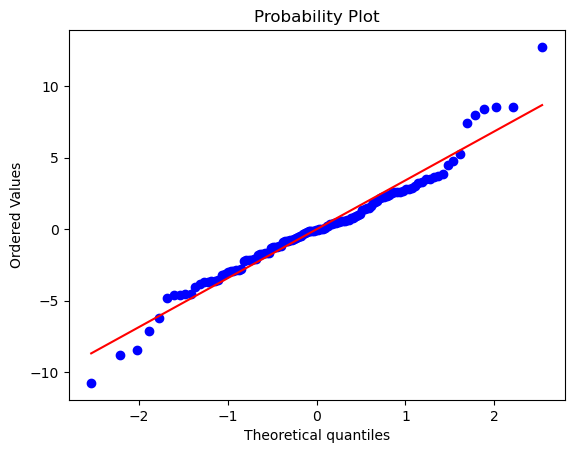

In [40]:
stats.probplot(residuals,plot=plt)
plt.show()

In [41]:
# Normalizing the dependent variable to check if the residuals tend to get normally distributed or not

y_ln = np.log(y)

model = sm.OLS(y_ln,xc_signi).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     103.4
Date:                Mon, 12 May 2025   Prob (F-statistic):           2.13e-44
Time:                        08:50:31   Log-Likelihood:                 197.11
No. Observations:                 124   AIC:                            -380.2
Df Residuals:                     117   BIC:                            -360.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.0803      0.043     94.582      0.000       3.995       4.166
Adult_Mortality      -0.0003   5.68e-05     -5.940      0.000      -0.000      -0.000
Hepatitis             0.0006      0.000      2.580      0.011       0.000       0.001
HIV                  -0.0202      0.004     -5.584      0.000      -0.027      -0.013
Population        -2.217e-10   1.16e-10     -1.906      0.059   -4.52e-10    8.62e-12
Income_Index          0.3329      0.045      7.438      0.000       0.244       0.422
Status_Developing    -0.0314      0.015     -2.032      0.044      -0.062      -0.001
==============================================================================
Omnibus:                        9.979   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               21.492
Skew:                           0.183   Prob(JB):                     2.15e-05
Kurtosis:                       5.006   Cond. No.                     6.00e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# After dependent variable transformation as well, the residuals are not normally distributed.

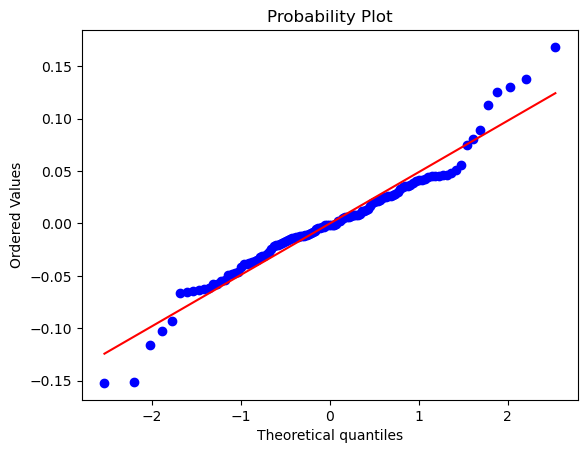

In [43]:
residuals = model.resid

stats.probplot(residuals,plot=plt)
plt.show()

**11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)**

In [44]:
df1 = df.drop('Country',axis=1)
df1 = pd.get_dummies(df1,columns=['Status'],dtype='int64',drop_first=True)

y = df1['Expected']
x = df1.drop('Expected',axis=1)

xc = sm.add_constant(x)
xc['Status_GDP'] = xc['Status_Developing']*x['GDP']
xc = xc[cols+['Status_GDP']]

model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     87.27
Date:                Mon, 12 May 2025   Prob (F-statistic):           3.21e-43
Time:                        08:50:31   Log-Likelihood:                -326.56
No. Observations:                 124   AIC:                             669.1
Df Residuals:                     116   BIC:                             691.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                61.7896      3.237     19.088      0.000      55.378      68.201
Adult_Mortality      -0.0229      0.004     -5.879      0.000      -0.031      -0.015
Hepatitis             0.0369      0.016      2.376      0.019       0.006       0.068
HIV                  -1.1791      0.251     -4.697      0.000      -1.676      -0.682
Population        -1.579e-08   7.99e-09     -1.976      0.051   -3.16e-08     3.6e-11
Income_Index         20.5428      3.451      5.952      0.000      13.707      27.378
Status_Developing    -4.0551      1.234     -3.287      0.001      -6.499      -1.612
Status_GDP            0.0001   4.97e-05      2.192      0.030    1.05e-05       0.000
==============================================================================
Omnibus:                        5.499   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                6.957
Skew:                           0.207   Prob(JB):                       0.0309
Kurtosis:                       4.084   Cond. No.                     6.75e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# There is a significant impact made by the interacion of status developing and GDP.

**12. Construct a full no-intecept model. What would you conclude when all the variables take value 0?**

In [46]:
y = df1['Expected']
x = df1.drop('Expected',axis=1)

model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Expected   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              940.0
Date:                Mon, 12 May 2025   Prob (F-statistic):                   4.84e-108
Time:                        08:50:32   Log-Likelihood:                         -399.28
No. Observations:                 124   AIC:                                      830.6
Df Residuals:                     108   BIC:                                      875.7
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Adult_Mortality      -0.0069      0.007     -0.960      0.339      -0.021       0.007
Infant_Deaths        -0.0807      0.066     -1.224      0.223      -0.211       0.050
Hepatitis             0.0305      0.058      0.523      0.602      -0.085       0.146
Measles              -0.0002      0.000     -1.516      0.133      -0.000    5.18e-05
BMI                  -0.0697      0.041     -1.696      0.093      -0.151       0.012
Underfive_Deaths      0.0712      0.048      1.482      0.141      -0.024       0.166
Polio                 0.0180      0.040      0.449      0.654      -0.061       0.097
Diphtheria            0.0388      0.073      0.535      0.593      -0.105       0.183
HIV                   0.5728      0.455      1.258      0.211      -0.330       1.475
GDP               -3.684e-05    6.3e-05     -0.585      0.560      -0.000    8.81e-05
Population        -1.747e-08   1.58e-08     -1.107      0.271   -4.87e-08    1.38e-08
Malnourished10_19    -1.1120      0.546     -2.035      0.044      -2.195      -0.029
Malnourished5_9       1.6540      0.496      3.334      0.001       0.671       2.637
Income_Index         43.2384     11.241      3.846      0.000      20.956      65.520
Schooling             2.1667      0.601      3.608      0.000       0.976       3.357
Status_Developing     7.8535      1.821      4.313      0.000       4.244      11.463
==============================================================================
Omnibus:                        7.813   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.565
Skew:                           0.588   Prob(JB):                       0.0228
Kurtosis:                       3.282   Cond. No.                     8.75e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Now we shall consider the FEV dataset.

### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in youths and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height (cm):** Height (cm) in cm 

**Sex:** Gender of a person

**Smoke_habits** Whether the person is a smoker or non- smoker

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [47]:
df3 = pd.read_csv('FEV_data.csv')
df3.head()

,Age,Height (cm),Sex,Smoke_habit,FEV
0,16,157.0,F,smoker,1.708
1,17,167.5,F,smoker,1.724
2,19,154.5,F,smoker,1.720
3,16,163.0,M,smoker,1.558
4,16,157.0,M,smoker,1.895


**13. Identify the numeric variable(s) that have highest impact on the FEV of a person**

In [48]:
df3_1 = df3.select_dtypes(include = np.number)
df3_1

,Age,Height (cm),FEV
0,16,157.0,1.708
1,17,167.5,1.724
2,19,154.5,1.720
3,16,163.0,1.558
4,16,157.0,1.895
...,...,...,...
649,16,167.0,4.270
650,15,168.0,3.727
651,18,170.0,2.853
652,16,163.0,2.795


In [49]:
y = df3_1['FEV']
x = df3_1.drop('FEV',axis=1)

xc = sm.add_constant(x)

model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     710.0
Date:                Mon, 12 May 2025   Prob (F-statistic):          2.53e-164
Time:                        08:50:32   Log-Likelihood:                -455.76
No. Observations:                 654   AIC:                             917.5
Df Residuals:                     651   BIC:                             931.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -17.5653      0.538    -32.672      0.000     -18.621     -16.510
Age             0.0019      0.007      0.277      0.781      -0.012       0.016
Height (cm)     0.1250      0.003     37.123      0.000       0.118       0.132
==============================================================================
Omnibus:                      123.607   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              979.512
Skew:                          -0.592   Prob(JB):                    2.00e-213
Kurtosis:                       8.877   Cond. No.                     4.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# Height is the numerical variable that has the highest imapct on FEV.

In [51]:
# Age is insignificant as it's p-value is more than 0.05. 
# Therefore, Height has the highest impact on FEV of a person i.e. for every 1 unit change in height there is 0.1250 times change in FEV.

**14. What is the impact of smoking habit of a person on FEV?**

In [52]:
df3.head()

,Age,Height (cm),Sex,Smoke_habit,FEV
0,16,157.0,F,smoker,1.708
1,17,167.5,F,smoker,1.724
2,19,154.5,F,smoker,1.720
3,16,163.0,M,smoker,1.558
4,16,157.0,M,smoker,1.895


In [53]:
df3_2 = pd.get_dummies(df3,columns=['Smoke_habit'],dtype='int64',drop_first=True)
df3_2.head()

,Age,Height (cm),Sex,FEV,Smoke_habit_smoker
0,16,157.0,F,1.708,1
1,17,167.5,F,1.724,1
2,19,154.5,F,1.720,1
3,16,163.0,M,1.558,1
4,16,157.0,M,1.895,1


In [54]:
y = df3_2['FEV']
x = df3_2['Smoke_habit_smoker']

xc = sm.add_constant(x)

model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     70.92
Date:                Mon, 12 May 2025   Prob (F-statistic):           2.36e-16
Time:                        08:50:32   Log-Likelihood:                -800.43
No. Observations:                 654   AIC:                             1605.
Df Residuals:                     652   BIC:                             1614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.4206      0.098     34.729      0.000       3.227       3.614
Smoke_habit_smoker    -0.8778      0.104     -8.422      0.000      -1.082      -0.673
==============================================================================
Omnibus:                       37.782   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.957
Skew:                           0.622   Prob(JB):                     4.70e-10
Kurtosis:                       3.167   Cond. No.                         5.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Smoking has negative impact on FEV of a person. So somkers exhalation reduces by 0.8778 compared to that of non-smokers.

**15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether there is multicollinearity present or not?**

In [56]:
df3_3 = pd.get_dummies(df3,columns=['Sex'],dtype='int64',drop_first=True)
df3_3 = pd.get_dummies(df3_3,columns=['Smoke_habit'],dtype='int64',drop_first=True)
df3_3.head()

,Age,Height (cm),FEV,Sex_M,Smoke_habit_smoker
0,16,157.0,1.708,0,1
1,17,167.5,1.724,0,1
2,19,154.5,1.720,0,1
3,16,163.0,1.558,1,1
4,16,157.0,1.895,1,1


In [57]:
y = df3_3['FEV']
x = df3_3.drop('FEV',axis=1)

xc = sm.add_constant(x)

In [58]:
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     379.5
Date:                Mon, 12 May 2025   Prob (F-statistic):          2.78e-168
Time:                        08:50:33   Log-Likelihood:                -439.94
No. Observations:                 654   AIC:                             889.9
Df Residuals:                     649   BIC:                             912.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.5268      0.575    -28.727      0.000     -17.656     -15.397
Age                    0.0026      0.007      0.374      0.708      -0.011       0.016
Height (cm)            0.1192      0.003     34.063      0.000       0.112       0.126
Sex_M                  0.1801      0.038      4.769      0.000       0.106       0.254
Smoke_habit_smoker    -0.2231      0.063     -3.515      0.000      -0.348      -0.098
==============================================================================
Omnibus:                      113.397   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.393
Skew:                          -0.625   Prob(JB):                    2.16e-142
Kurtosis:                       7.730   Cond. No.                     5.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
vif_df = [vif(xc.values,i) for i in range(xc.shape[1])]
vif_df = pd.DataFrame(vif_df,index=xc.columns,columns=['vif'])
vif_df

,vif
const,955.517180
Age,1.028729
Height (cm),1.160690
Sex_M,1.028686
Smoke_habit_smoker,1.111985


In [60]:
# As all the variables are equal to 1 there is no perfect multicollinearity.

**16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?**

In [61]:
y=df3['FEV']
x=df3.drop(['FEV','Sex','Smoke_habit'],axis=1)
xc=sm.add_constant(x)

model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     710.0
Date:                Mon, 12 May 2025   Prob (F-statistic):          2.53e-164
Time:                        08:50:33   Log-Likelihood:                -455.76
No. Observations:                 654   AIC:                             917.5
Df Residuals:                     651   BIC:                             931.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -17.5653      0.538    -32.672      0.000     -18.621     -16.510
Age             0.0019      0.007      0.277      0.781      -0.012       0.016
Height (cm)     0.1250      0.003     37.123      0.000       0.118       0.132
==============================================================================
Omnibus:                      123.607   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              979.512
Skew:                          -0.592   Prob(JB):                    2.00e-213
Kurtosis:                       8.877   Cond. No.                     4.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
# The durbin watson test is 1.676 and there exists positive correlation among the features and FEV. 

**17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed.**

In [63]:
y=df3['FEV']
x=df3.drop(['FEV','Sex','Smoke_habit'],axis=1)
xc=sm.add_constant(x)

model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     710.0
Date:                Mon, 12 May 2025   Prob (F-statistic):          2.53e-164
Time:                        08:50:33   Log-Likelihood:                -455.76
No. Observations:                 654   AIC:                             917.5
Df Residuals:                     651   BIC:                             931.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -17.5653      0.538    -32.672      0.000     -18.621     -16.510
Age             0.0019      0.007      0.277      0.781      -0.012       0.016
Height (cm)     0.1250      0.003     37.123      0.000       0.118       0.132
==============================================================================
Omnibus:                      123.607   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              979.512
Skew:                          -0.592   Prob(JB):                    2.00e-213
Kurtosis:                       8.877   Cond. No.                     4.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: ylabel='Density'>

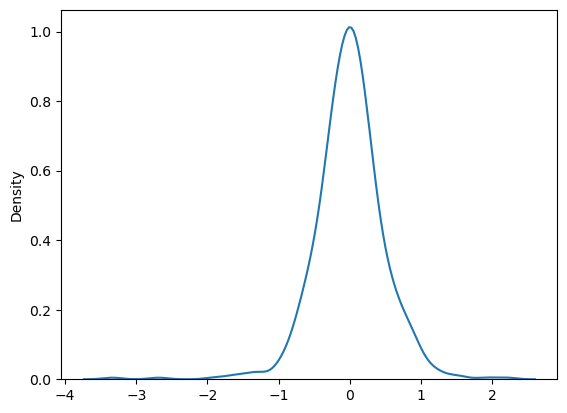

In [64]:
residuals = model.resid
sns.kdeplot(residuals)

In [65]:
# The residuals have a slight left skewness.

<a id="ml_perf"> </a>
## 6. Model Performance

**18. Build a full model on 70% of the given data. Calculate the mean square error and the root mean square error on the test set.**

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [67]:
y = df3['FEV']
x = df3.drop(['FEV','Sex','Smoke_habit'],axis=1)

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [69]:
lir = LinearRegression()
model = lir.fit(x_train,y_train)

In [70]:
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

In [71]:
print("R-Squared - Train:",r2_score(y_train,y_train_predict))
print("Mean Squared Error - Train",mean_squared_error(y_train,y_train_predict))
print("Root Mean Squared Error - Train",np.sqrt(mean_squared_error(y_train,y_train_predict)))

R-Squared - Train: 0.6560366537234239
Mean Squared Error - Train 0.2530382679451288
Root Mean Squared Error - Train 0.5030290925434917


In [72]:
print("R-Squared - Test:",r2_score(y_test,y_test_predict))
print("Mean Squared Error - Test",mean_squared_error(y_test,y_test_predict))
print("Root Mean Squared Error - Test",np.sqrt(mean_squared_error(y_test,y_test_predict)))

R-Squared - Test: 0.7407600422160474
Mean Squared Error - Test 0.20215558811928672
Root Mean Squared Error - Test 0.4496171572785971


**19. Calculate the mean absolute error and the  mean absolute percentage error for the test set using the model in Q18. Compare the values of RMSE and MAE.**

In [73]:
from sklearn.metrics import mean_absolute_error

In [74]:
mae_train = mean_absolute_error(y_train,y_train_predict)
mae_test = mean_absolute_error(y_test,y_test_predict)

mape_train = np.mean(np.abs((y_train-y_train_predict)/y_train))
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predict))

mape_test = np.mean(np.abs((y_test-y_test_predict)/y_test))
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_predict))

In [75]:
print('Mean Absolute Error Train:',mae_train)
print('Mean Absolute Percentage Error Train:',mape_train)
print('Root Mean Squared Error Train:',rmse_train)
print()
print('Mean Absolute Error Test:',mae_test)
print('Mean Absolute Percentage Error Test:',mape_test)
print('Root Mean Squared Error Test:',rmse_test)

Mean Absolute Error Train: 0.3544306841424011
Mean Absolute Percentage Error Train: 0.14610023235465022
Root Mean Squared Error Train: 0.5030290925434917

Mean Absolute Error Test: 0.32856565406062116
Mean Absolute Percentage Error Test: 0.12260206843964047
Root Mean Squared Error Test: 0.4496171572785971


**20. Build the full model on 80% of the given data and check if the model is overfitted?**

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

lir = LinearRegression()
model = lir.fit(x_train,y_train)

y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

print("R-Squared - Train:",r2_score(y_train,y_train_predict))
print("Mean Squared Error - Train",mean_squared_error(y_train,y_train_predict))
print("Root Mean Squared Error - Train",np.sqrt(mean_squared_error(y_train,y_train_predict)))
print()
print("R-Squared - Test:",r2_score(y_test,y_test_predict))
print("Mean Squared Error - Test",mean_squared_error(y_test,y_test_predict))
print("Root Mean Squared Error - Test",np.sqrt(mean_squared_error(y_test,y_test_predict)))

R-Squared - Train: 0.6673004078905161
Mean Squared Error - Train 0.24367944818923937
Root Mean Squared Error - Train 0.49363898568613823

R-Squared - Test: 0.7443577171628586
Mean Squared Error - Test 0.2090805731750885
Root Mean Squared Error - Test 0.4572532921424279


In [77]:
# There is no evidence of overfitting, model is generalized and reliable.